In [74]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import io
from math import atan

In [75]:
# Declare constants
A = 0.057
ao = -0.698
Cda = 0.69
Cdo = 0.18
Cla = 3.09
Cld = 0.13

g = 9.81
m = 0.175
P = 1.23
theta = 0

# Declare step size
h = 0.01

# Declare arrays
xplot = [[],[],[],[],[],[],[],[]]
yplot = [[],[],[],[],[],[],[],[]]
tplot = [[],[],[],[],[],[],[],[]]

In [76]:
# Declare initial conditions
for i in range (0,7):
    x = 0.0
    y = 1.0
    u = 0.0
    w = 0.0
    t = 0

    theta = (i*5)*(np.pi/180)
        
    up = np.sin(theta)*14
    wp = np.cos(theta)*14
    
    while (y > 0):

        # Add x,y and t values to respective arrays
        xplot[i].append(x)
        yplot[i].append(y)
        t += h
        tplot[i].append(t)

        # Euler Method: Assume y and x are approximately the previous value summed with the respective slope multiplied by change in time
        y = y + (h*up)
        x = x + (h*wp)

        # Update new velocity in the y values (u) and velocity in the x values (w)
        u = up + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.sin(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.sin(np.pi+ np.arctan(-up/wp)) - m * g )
        w = wp + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.cos(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.cos(np.pi - np.arctan(-up/wp)))
        up = u
        wp = w

        # print(str(x) + " " + str(y) + " " + str(t))

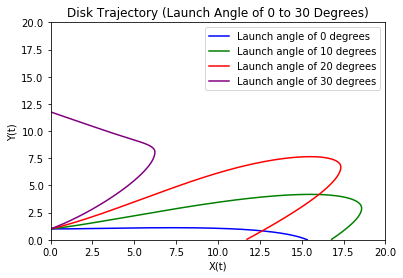

In [77]:
# Plot trajectory (x,y) graph

plt.plot(xplot[0], yplot[0], color = 'blue', label = 'Launch angle of 0 degrees')
plt.plot(xplot[2], yplot[2], color = 'green', label = 'Launch angle of 10 degrees')
plt.plot(xplot[4], yplot[4], color = 'red', label = 'Launch angle of 20 degrees')
plt.plot(xplot[6], yplot[6], color = 'purple', label = 'Launch angle of 30 degrees')

plt.ylabel('Y(t)')
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.xlabel('X(t)')
plt.title('Disk Trajectory (Launch Angle of 0 to 30 Degrees)')
plt.legend()
plt.show()

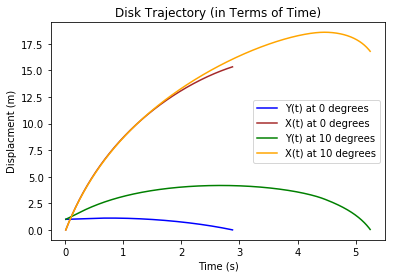

In [78]:
# Plot trajectory X and Y in terms of time
plt.plot(tplot[0], yplot[0], color = 'blue', label='Y(t) at 0 degrees')
plt.plot(tplot[0], xplot[0], color = 'brown', label='X(t) at 0 degrees')

plt.plot(tplot[2], yplot[2], color = 'green', label='Y(t) at 10 degrees')
plt.plot(tplot[2], xplot[2], color = 'orange', label='X(t) at 10 degrees')

# plt.plot(tplot[4], yplot[4], color = 'red', label='Y(t)')
# plt.plot(tplot[4], xplot[4], color = 'purple', label='X(t)')

# plt.plot(tplot[6], yplot[6], color = 'red', label='Y(t)')
# plt.plot(tplot[6], xplot[6], color = 'purple', label='X(t)')


plt.ylabel('Displacment (m)')
plt.xlabel('Time (s)')
plt.title('Disk Trajectory (in Terms of Time)')
plt.legend()
plt.show()